Ce notebook nécessite de disposer du logiciel [graphviz](https://graphviz.org/download/) ainsi que du module graphviz pour python (`pip install graphviz`).

### Installation de graphviz sous Windows (méthode 1)

- On se rendra sur la page dédiée : [Downloads](https://graphviz.org/download/) de Graphviz.

	- Normalement le lien pour l'installeur de la version stable (parfois rompu lors des MAJ des dépôts) vous conduit sur cette page :
	- (https://www2.graphviz.org/Packages/stable/windows/). Il faudra ensuite suivre les liens pour parvenir à 
	- (https://www2.graphviz.org/Packages/stable/windows/10/cmake/Release/)

- Lors de l'installation du logiciel, demandez bien à actualiser le PATH Windows.

- Une fois le logiciel installé, il vous faut installer le module permettant à Python de communiquer avec le logiciel Graphviz :

	- `pip install graphviz`
	
### Installation de graphviz sous Windows (méthode 2)

- Si ce qui est indiqué sur la page [Downloads](https://graphviz.org/download/) de Graphviz conduit au dépôt Github (cela arrive parfois lorsque Graphviz effectue une MAJ sur ses serveus de dépôt) on préférera l'installeur .msi de la version 2.38 qui est toujours disponible ici :  

**[installeur MSI pour Windows](https://graphviz.gitlab.io/_pages/Download/Download_windows.html)** 


- Une fois l'installation du logiciel effectuée, on ajoutera alors graphviz au Path Windows (pour que python puisse le trouver) manuellement car la 2.38 ne le propose pas lors de l'installation :

	- Paramètres > Propriétés Système > Variables d'environnement > Variables système > Path > Modifier > Nouveau 
	
	- copier le chemin vers l'installation de graphviz (sans doute "C:\Program Files (x86)\Graphviz2.38\bin")
	
- Il suffira ensuite d'installer le module permettant à Python de communiquer avec le logiciel Graphviz :

	- `pip install graphviz`

### Installation de graphviz sous Debian/Ubuntu

- `sudo apt install graphviz`

- Il suffira ensuite d'installer le module permettant à Python de communiquer avec le logiciel Graphviz :

	- `pip install graphviz`

# I : Premiers exemples d'utilisation de l'afficheur pour les graphes

L'afficheur gère plusieurs représentations de graphes :

- `liste` : représentation par liste d'adjacence sous forme d'un dictionnaire dont les valeurs sont des listes,
- `liste_pond` (*): représentation par liste d'adjacence pondérée sous forme d'un dictionnaire dont les valeurs sont des dictionnaires,
- `matrice_bool` : représentation par matrice de booléens,
- `matrice_bin` : représentation par matrice de zéros ou de uns,
- `matrice_pond` : représentation par matrice pondérée de scalaires.

Il n'y a pas de contrainte sur le type des étiquettes (`int, str, tuple ...`) si ce n'est leur taille qui doit rester concise pour obtenir un affichage correct.

(*) : sans doute trop ardu en NSI.




**Remarque sur ce que cet afficheur ne fait pas :**  
Cet afficheur ne placera pas toujours vos sommets de la façon dont vous l'imaginez a priori : 
- si vous souhaitez un alignement précis des sommets ou des coordonnées précises pour ceux-ci (par exemple je fais un graphe en forme de bateau), cet afficheur ne le fera pas
- si vous souhaitez que le sommet 'A' soit au centre  et le sommet 'Z' en bas à droite, il y a peu de chances que cet afficheur vous  produise cet affichage.

Néanmoins :
- en fonction du moteur de placement des sommets utilisés, il est possible qu'il vous affiche ce que vous souhaitiez,
- dans le cas des graphes planaires, on souhaite éviter d'avoir les arcs qui se croisent car cela rend le graphe illisible. Les moteur `neato` et `fdp` y parviennent dans la majorité des cas,
- si votre graphe a vocation à être mis dans un cours ou en exercices, il est possible de l'exporter en svg et de faire les affinages grâce à Inkscape,
- si ça ne vous satisfait toujours pas --> LaTeX :-)



In [1]:
from vizu_graphe import VizuGraphe

## I.1 : graphe défini par une liste d'adjacence (paramètre `'liste'`)

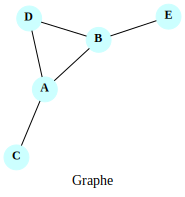

In [2]:
ma_liste = {'A':['B', 'C', 'D'],
            'B':['A', 'D', 'E'],
            'C':['A'],
            'D':['A', 'B'],
            'E':['B']}

v = VizuGraphe('liste', ma_liste)

`v` pourra être utilisé ensuite pour redessiner ou enregistrer le graphe.  

**MAJ :** voir au I.6 pour des paramètres additionnels que l'on peut désormais passer dès l'appel à VizuGraphe, sans forcément passer par `modifier`.

## I.2 : graphe défini par une liste d'adjacence pondérée (paramètre `'liste_pond'`)

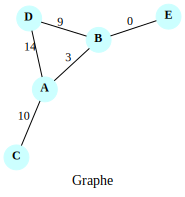

In [3]:
ma_liste = {'A':{'B':3, 'C':10, 'D':14},
            'B':{'A':3, 'D':9, 'E':0},
            'C':{'A':10},
            'D':{'A':14, 'B':9},
            'E':{'B':0}}

v = VizuGraphe('liste_pond', ma_liste)

`v` pourra être utilisé ensuite pour redessiner ou enregistrer le graphe.  

Remarquer que contrairement à la matrice pondérée (voir plus bas) le poids 0 entraîne le dessin d'une arête.  

**MAJ :** voir au I.6 pour des paramètres additionnels que l'on peut désormais passer dès l'appel à VizuGraphe, sans forcément passer par `modifier`.

## I.3 : graphe défini par une matrice de booléens (paramètre `'matrice_bool'`)

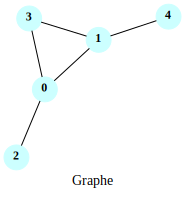

In [4]:
ma_matrice = [[False, True,  True,  True,  False],
              [True,  False, False, True,  True ],
              [True,  False, False, False, False],
              [True,  True,  False, False, False],
              [False, True,  False, False, False]]

v = VizuGraphe('matrice_bool', ma_matrice)
        

Avec les matrices de taille `NxN`, les sommets sont par défaut numérotés de `0` à `N-1`.  
Nous verrons que l'on peut facilement rajouter des étiquettes quelconques.

`v` pourra être utilisé ensuite pour redessiner ou enregistrer le graphe.  

**MAJ :** voir au I.6 pour des paramètres additionnels que l'on peut désormais passer dès l'appel à VizuGraphe, sans forcément passer par `modifier`.

## I.4 : graphe défini par une matrice de zéros et de uns (paramètre `'matrice_bin'`)

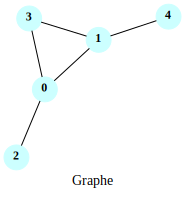

In [5]:
ma_matrice = [[0, 1, 1, 1, 0],
              [1, 0, 0, 1, 1],
              [1, 0, 0, 0, 0],
              [1, 1, 0, 0, 0],
              [0, 1, 0, 0, 0]]

v = VizuGraphe('matrice_bin', ma_matrice)

`v` pourra être utilisé ensuite pour redessiner ou enregistrer le graphe.  

**MAJ :** voir au I.6 pour des paramètres additionnels que l'on peut désormais passer dès l'appel à VizuGraphe, sans forcément passer par `modifier`.

## I.5 : graphe défini par une matrice pondérée de scalaires (paramètre `'matrice_pond'`)

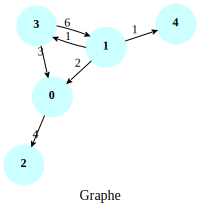

In [8]:
ma_matrice = [[0, 0, 4, 0, 0],
              [2, 0, 0, 1, 1],
              [0, 0, 0, 0, 0],
              [3, 6, 0, 0, 0],
              [0, 0, 0, 0, 0]]

v = VizuGraphe('matrice_pond', ma_matrice, oriente = True, node_width = 0.55)

`v` pourra être utilisé ensuite pour redessiner ou enregistrer le graphe.  

Remarquer que contrairement à la liste d'adjacence pondérée, le poids 0 entraîne l'absence de dessin d'arête.

**MAJ :** voir au I.6 pour des paramètres additionnels que l'on peut désormais passer dès l'appel à VizuGraphe, sans forcément passer par `modifier`.

## I.6 : modification a posteriori des paramètres par défaut

On peut modifier **a posteriori** les paramètres de dessin par défaut. Voici un exemple avec tous les paramètres accessibles.

**MAJ :** Ces paramètres peuvent également être passés en `kwargs` dès le dessin initial lors de la construction de VizuGraphe.

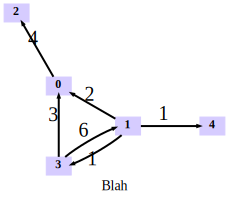

In [7]:
v.modifier(label = 'Blah',
            #size = 1,                 #à décommenter pour voir
            moteur = 'circo',
            oriente = True,
            node_shape = 'rect',
            node_width = 0.35,
            node_height = 0.25,
            node_color = (0.7, 0.2, 1),
            node_fontsize = 12,
            #node_small_fontsize = '8',  #ici pas d'étiquette secondaire : sans effet
            #node_style = 'bold',        #à décommenter pour voir
            #node_main = False           #à décommenter pour voir
            edge_fontsize = 20, 
            edge_style = 'bold',
            edge_arrowhead = 'normal',
            edge_arrowsize = 0.25,
            #reset = False                #inutile si aucune modification auparavant
            )

Pour plus de détails :

In [ ]:
help(VizuGraphe.modifier)

## I.7 : Export des graphiques

Les graphiques peuvent être exportés dans différents formats, y compris en vectoriel. Voici quelques formats d'export pris en charge par graphviz :
- `svg`
- `png`
- `pdf`
- `tiff`
- `jpg`
- `ps` 

On pourra consulter https://graphviz.org/doc/info/output.html pour plus d'informations.

**Remarque :** l'export produit également, en plus du fichier graphique, un fichier texte au format `graphviz` (sans extension, mais on pourra utilement rajouter l'extension `.gv`). 

In [ ]:
v.enregistrer(nom_fichier = 'mon_premier_export', format_image = 'png')

Pour plus de détails :

In [ ]:
help(VizuGraphe.enregistrer)

# II : Différencier l'aspect des sommets entre eux

Il parait intéressant de pouvoir disposer d'un graphe et de :
- pouvoir afficher une information en plus sur chaque sommet (par exemple le numéro d'ordre lors d'un parcours),
- pouvoir modifier la couleur des sommets,
- pouvoir modifier la forme des sommets,
- dans le cas des graphes représentés par des matrices, ajouter des étiquettes différentes des entiers par défaut,


**Remarque : limitation dans le cas d'étiquettes identiques**  
L'association `couleur <--> sommet` ou `information supplémentaire <--> sommet` ou `forme <--> sommet` est effectuée en se basant sur l'étiquette des sommets. S'il existe des sommets distincts portant la même étiquette, ils se verront attribuer la même chose.  

## II.1 : Indiquer des informations individuelles secondaires sur certains sommets

Elles sont rajoutées par l'intermédiaire d'un dictionnaire passé en paramètre `etiquettes_secondaires`. En pratique, ce dictionnaire a vocation à être généré lors d'un parcours de graphe. Un exemple est donné dans le notebook "Exemples d'application". Ici on se contente d'un cas fait à la main.

In [ ]:
ma_liste = {3:[7, 9, 4],
            7:[3, 4, 6],
            9:[3],
            4:[3, 7],
            6:[7]}

mes_infos_en_plus = {3:'A',
                     7:'b',
                     #9:'0', pas d'informations en plus pour le sommet 9 ...
                     4:'$',
                     6:'g'}

v = VizuGraphe('liste', ma_liste, etiquettes_secondaires = mes_infos_en_plus)

## II.2 : Utiliser des couleurs individuelles sur certains sommets

Elles sont modifiées par l'intermédiaire d'un dictionnaire passé en paramètre `couleurs`. En pratique, ce dictionnaire a vocation à être généré lors d'un parcours de graphe. Un exemple est donné dans le notebook "Exemples d'application". Ici on se contente d'un cas fait à la main.

Les couleurs doivent être au format HSV https://fr.wikipedia.org/wiki/Teinte_Saturation_Valeur  
L'intérêt de ce format (discutable) est qu'en jouant uniquement sur le paramètre `H`, on parcourt toutes les couleurs de l'arc en ciel.

In [ ]:
#pour les matrices de taille N, les clefs des dictionnaires vont de 0 à N-1

ma_matrice = [[0, 1, 1, 1, 0],
              [1, 0, 0, 1, 1],
              [1, 0, 0, 0, 0],
              [1, 1, 0, 0, 0],
              [0, 1, 0, 0, 0]]

mes_couleurs = {0:(1.00, 0.5, 1),
                1:(0.80, 0.5, 1),
                #2:(0.60, 0.5, 1),  #pas de modification de couleur pour le sommer 2
                3:(0.40, 0.5, 1),
                4:(0.20, 0.5, 1)}

v = VizuGraphe('matrice_bin', ma_matrice, couleurs = mes_couleurs)

## II.3 : Utiliser des formes individuelles sur certains sommets

Elles sont modifiées par l'intermédiaire d'un dictionnaire passé en paramètre `formes`. En pratique, ce dictionnaire a vocation à être généré lors d'un parcours de graphe. Un exemple est donné dans le notebook "Exemples d'application". Ici on se contente d'un cas fait à la main.

Les forment doivent être choisies parmi 'box', 'polygon', 'ellipse', 'oval', 'circle', 'folder', 'house' 
'egg', 'triangle' etc.  
Voir ici si besoin : https://graphviz.org/doc/info/shapes.html

In [ ]:
ma_liste = {3:[7, 9, 4],
            7:[3, 4, 6],
            9:[3],
            4:[3, 7],
            6:[7]}

mes_formes  = {3:'folder',
               7:'house',
               #9:'0', pas d'informations en plus pour le sommet 9 ...
               4:'star',
               6:'triangle'}

v = VizuGraphe('liste', ma_liste, formes = mes_formes)

## II.4 : Modifier les étiquettes principales choisies par l'utilisateur 

Il suffit de spécifier le dictionnaire `etiquettes_principales`. Cette fonctionnalité est là pour pouvoir identifier les sommets grâce à la matrice ou à la liste d'adjacence (avec des identifiants uniques), tout en permettant de mettre des étiquettes identiques à plusieurs sommets différents.

**Attention** : si vous choisissez de changer les étiquettes principales des sommets, il faudra modifier toutes les étiquettes.

In [ ]:
#pour les matrices de taille N, les clefs des dictionnaires vont de 0 à N-1

ma_matrice = [[0, 1, 1, 1, 0],
              [1, 0, 0, 1, 1],
              [1, 0, 0, 0, 0],
              [1, 1, 0, 0, 0],
              [0, 1, 0, 0, 0]]

mes_etiquettes = {0:'V',
                  1:'W',
                  2:'X',
                  3:'Y',
                  4:'Z'}

v = VizuGraphe('matrice_bin', ma_matrice, etiquettes_principales = mes_etiquettes)

## II.5 : Modifier a posteriori les informations individuelles sur les sommets

Alors que les modifications par défaut vues au I.6 s'appliquent à tous les sommets, il est possible de modifier les informations individuelles a posteriori toujours grâce à la méthode `modifier` pour les attributs vus au II :
- `etiquettes_secondaires` 
- `couleurs` 
- `formes` 
- `etiquettes_principales`

In [ ]:
mes_couleurs = {0:(1.00, 0.2, 0.75),
                2:(0.60, 0.2, 0.75),
                3:(0.40, 0.2, 0.75),
                4:(0.20, 0.2, 0.75)}

v.modifier(couleurs = mes_couleurs)

Plus de détails :

In [ ]:
help(VizuGraphe.modifier)

<div class = "alert alert-info">

**Résumé :**
    
- dessiner un graphique : `v = VizuGraphe( type_structure, structure, **kwargs )`
- modifier les paramètres par défaut ou individuels : `v.modifier(**kwargs)`
- exporter le graphique : `v.enregistrer(nom_fichier, format_image)`